<a href="https://colab.research.google.com/github/ferrari-leo/training/blob/main/time_series_python/03_tsa_deep_learning/RNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
dir_root = '/content/drive/MyDrive/TSA Udemy'
df = pd.read_csv(os.path.join(dir_root, 'Miles_Traveled.csv'), index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.rename(columns = {'TRFVOLUSM227NFWA':'Value'}, inplace = True)

<Axes: xlabel='DATE'>

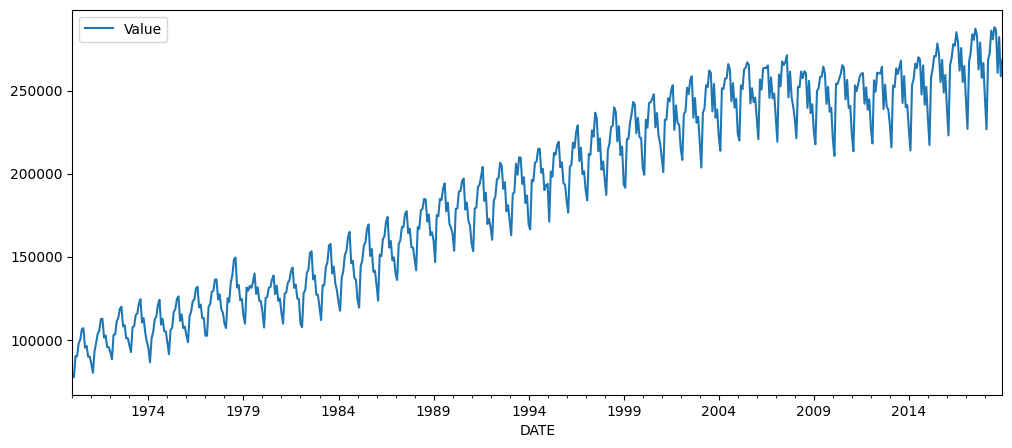

In [5]:
df.plot()

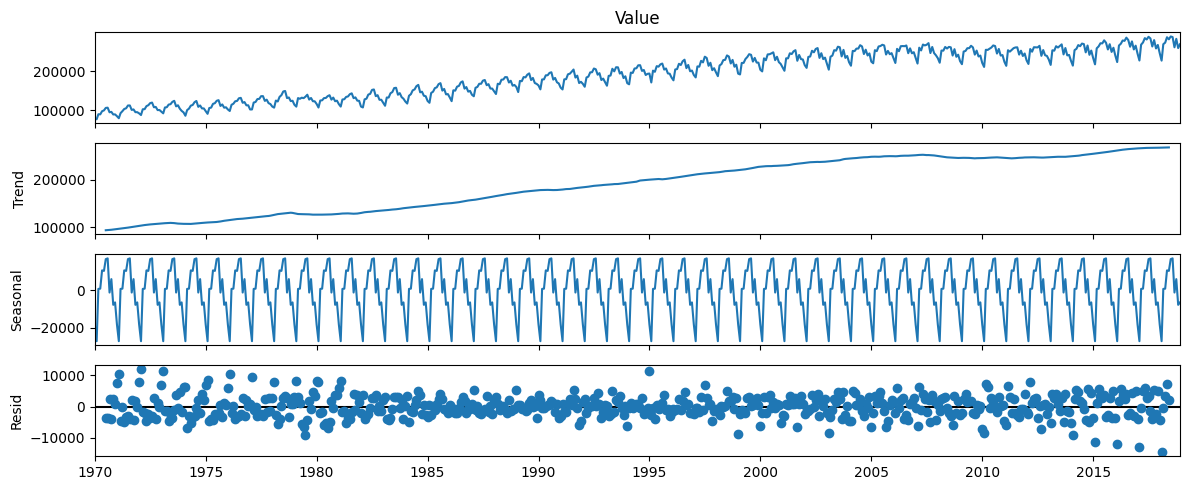

In [6]:
results = seasonal_decompose(df['Value'])
results.plot();

In [7]:
nobs = 12
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [8]:
scaler = MinMaxScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [10]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

In [13]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.fit(train_generator, epochs = 25)

Epoch 1/25
564/564 [==============================] - 12s 13ms/step - loss: 0.0109
Epoch 2/25
564/564 [==============================] - 8s 15ms/step - loss: 0.0051
Epoch 3/25
564/564 [==============================] - 7s 12ms/step - loss: 0.0043
Epoch 4/25
564/564 [==============================] - 8s 15ms/step - loss: 0.0026
Epoch 5/25
564/564 [==============================] - 8s 14ms/step - loss: 0.0022
Epoch 6/25
564/564 [==============================] - 7s 12ms/step - loss: 0.0017
Epoch 7/25
564/564 [==============================] - 8s 14ms/step - loss: 0.0015
Epoch 8/25
564/564 [==============================] - 7s 13ms/step - loss: 0.0015
Epoch 9/25
564/564 [==============================] - 8s 13ms/step - loss: 0.0013
Epoch 10/25
564/564 [==============================] - 8s 14ms/step - loss: 0.0011
Epoch 11/25
564/564 [==============================] - 6s 11ms/step - loss: 0.0011
Epoch 12/25
564/564 [==============================] - 6s 11ms/step - loss: 0.0011
Epoch 13/25


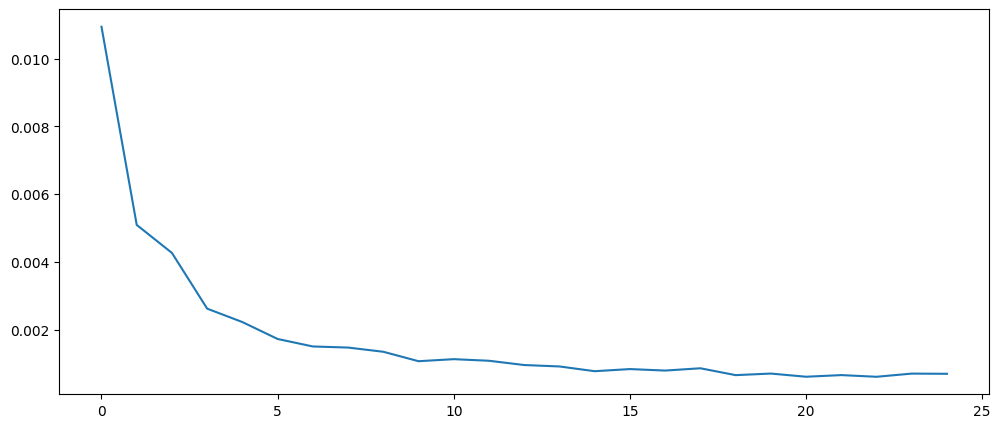

In [15]:
plt.plot(
    range(len(model.history.history['loss'])),
    model.history.history['loss']
);

In [19]:
first_eval_batch = train_scaled[-n_input:].reshape((1,n_input,n_features))
test_preds = []
current_batch = first_eval_batch
for i in range(12):
  current_pred = model.predict(current_batch)[0]
  test_preds.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)



1/1 [==============================] - 0s 105ms/step


<ipython-input-21-70b271ffd619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Preds'] = scaler.inverse_transform(test_preds)


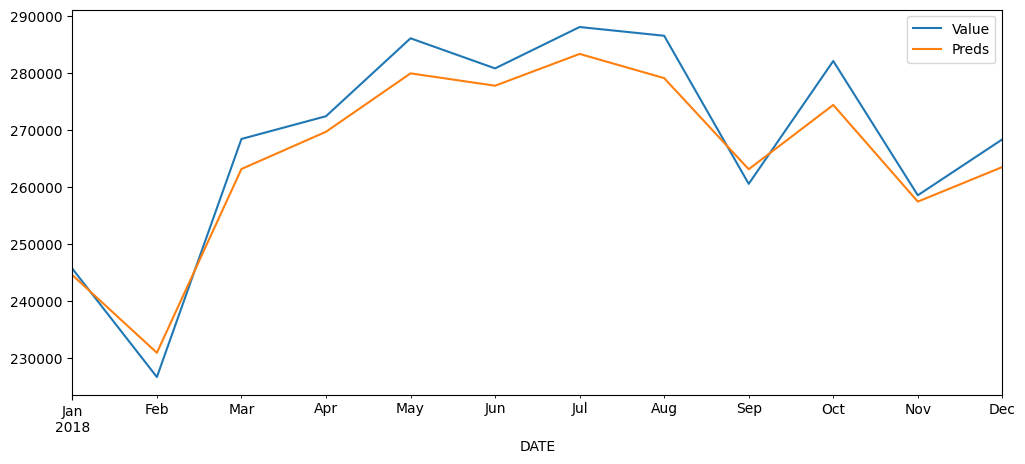

In [21]:
test['Preds'] = scaler.inverse_transform(test_preds)
test.plot();